<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex3/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla terza esercitazione di Metodi Numerici!

Oggi vedremo il concetto di regolarizzazione (*sparsità* e *regolarità* (smoothness)) in modo pratico verificando l'effetto su segniali definiti su diversi domini. Importiamo i requirements, definiamo alcune funzioni di supporto e scarichiamo i dati necessari:

In [ ]:
import librosa
import numpy as np
import IPython
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy

In [ ]:
def plot(x, y, title=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    ax.set_xlabel('t')
    ax.set_title(title)
    ax.plot(x, y, '-')
    plt.show()

In [ ]:
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav

--2022-03-21 08:34:27--  https://github.com/erodola/NumMeth-s2-2022/raw/main/esercizi/ex3/drums.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav [following]
--2022-03-21 08:34:28--  https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex3/drums.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21305422 (20M) [application/octet-stream]
Saving to: ‘drums.wav’

drums.wav           100%[===================>]  20.32M  --.-KB/s    in 0.1s    

2022-03-21 08:34:28 (153 MB/s) - ‘drums.wav’ saved [21305422/21305422]



## 1. Regolarizzazione di Tikhonov

Riprendiamo il fitting di polinomi usando il metodo dei minimi quadrati. Supponiamo di trovarci nel caso in cui il numero di punti a disposizione è inferiore a quello del grado del polinomio. Per esempio se abbiamo $n=4$, il sistema è sotto-determinato nel caso in cui il numero di coppie di punti a nostra disposizione è inferiore a 5. 

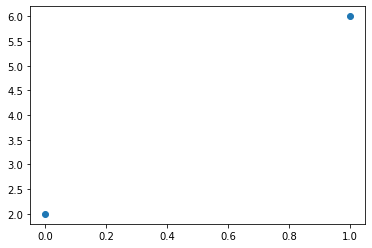

In [ ]:
n = 4

x2 = np.array([0, 1])[:, np.newaxis]
y2 = np.array([2., 6.])[:, np.newaxis]

plt.scatter(x2, y2)

Proviamo a trovare una soluzione $\theta$ usando il regolarizzatore di Tikhonov
$ \mathbf{\theta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$. Per questo esempio scegliamo $\alpha = 1$.

In [ ]:
X2 = np.concatenate((x2**4, x2**3, x2**2, x2**1, x2**0),1)
print(f"X2 = {X2}")

theta2 = np.linalg.inv(X2.T @ X2 + 1. * np.eye(5)) @ X2.T @ y2
print(f"theta = {theta2}")

X2 = [[0 0 0 0 1]
 [1 1 1 1 1]]
theta = [[0.90909091]
 [0.90909091]
 [0.90909091]
 [0.90909091]
 [1.45454545]]


In [ ]:
x2_new = np.linspace(-2, 2, 20)[:, np.newaxis]
X2_new = np.concatenate((x2_new**4, x2_new**3, x2_new**2, x2_new**1, x2_new**0),1)
y2_new = X2_new@theta2  
print(f"y2_new = {y2_new}")

y2_new = [[10.54545455]
 [ 6.85149885]
 [ 4.35737769]
 [ 2.77111273]
 [ 1.84358483]
 [ 1.36853406]
 [ 1.18255971]
 [ 1.16512025]
 [ 1.23853338]
 [ 1.367976  ]
 [ 1.5614842 ]
 [ 1.86995328]
 [ 2.38713777]
 [ 3.24965139]
 [ 4.63696704]
 [ 6.77141687]
 [ 9.91819221]
 [14.3853436 ]
 [20.52378079]
 [28.72727273]]


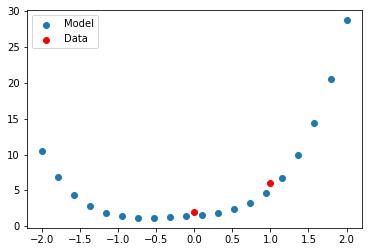

In [ ]:
plt.scatter(x2_new, y2_new)
plt.scatter(x2, y2, color='r')
plt.legend(['Model', 'Data'])

**Esercizio 1**

 1. Rifare l'esempio aggiungendo un data point. Confrontare la soluzione
 per lo stesso valore di $\alpha = 1$
 2. Provare a variare il valore di $\alpha$ usando i valori [0.1, 0.5, 10., 100.]. Plottare le diverse curve fittate insieme alle componenti di $\theta$. Come cambiano le componenti di $\theta$ all'aumentare di $\alpha$ (calcolare la norma delle diverse alpha)? 
 3. Cosa succede quando $\alpha \to 0$? Come si può interpretare in modo matematico questo fenomeno?

theta = [[-1.47310272]
 [-0.6286992 ]
 [ 1.06010785]
 [ 4.43772195]
 [ 2.83572274]]
np.linalg.norm(theta) = 5.605695546204316
theta = [[0.01555664]
 [0.31178091]
 [0.90422946]
 [2.08912656]
 [2.81964025]]
np.linalg.norm(theta) = 3.6372931143792906
theta = [[0.35905655]
 [0.39082503]
 [0.454362  ]
 [0.58143594]
 [0.94143983]]
np.linalg.norm(theta) = 1.3086204014000584
theta = [[0.05973582]
 [0.06366674]
 [0.07152859]
 [0.08725227]
 [0.13732637]]
np.linalg.norm(theta) = 0.19801427427282725


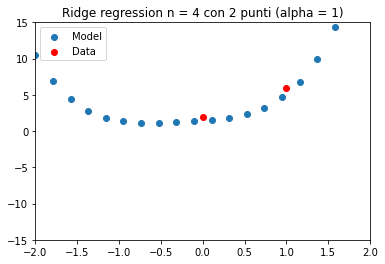

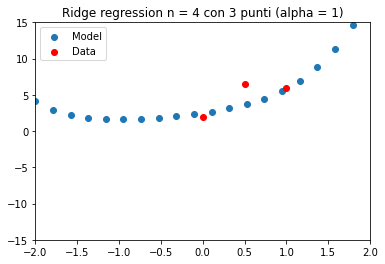

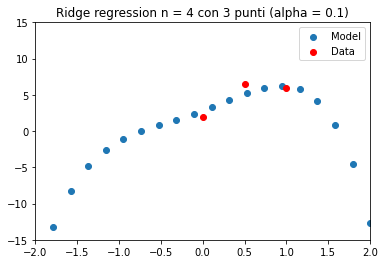

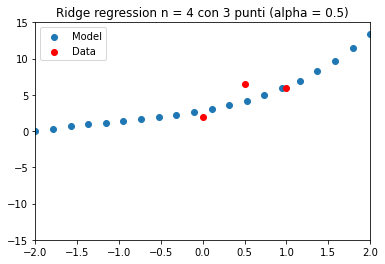

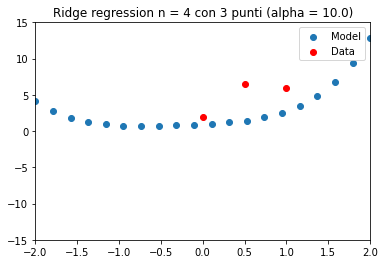

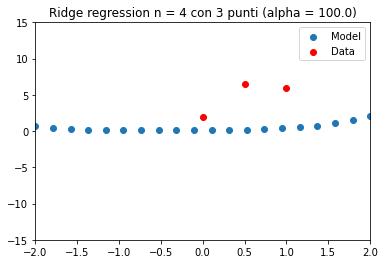

In [ ]:
n = 4
alpha = 1.

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################
# 1. Rifare l'esempio aggiungendo un data point. Confrontare la soluzione per lo stesso valore di 𝛼=1

# Aggiungiamo un punto a x

x3 = ... # np.array([x2[0, 0], x2[1, 0], 0.5])[:, np.newaxis]
y3 = ... # np.array([y2[0, 0], y2[1, 0], 6.5])[:, np.newaxis]


# Creiamo la matrice dei dati X3
X3 = ... # np.concatenate((x3**4, x3**3, x3**2, x3**1, x3**0),1)

# Applichiamo la formula della ridge regression
theta3 = ... # np.linalg.inv(X3.T @ X3 + 1. * np.eye(5)) @ X3.T @ y3

# Valutiamo il nuovo modello in alcuni punti
x3_new = ... # np.linspace(-2, 2, 20)[:, np.newaxis]
X3_new = ... # np.concatenate((x3_new**4, x3_new**3, x3_new**2, x3_new**1, x3_new**0),1)
y3_new = ... # X3_new@theta3  

# Plottiamo il nuovo modello (e confrontiamo con il modello fittato con 2 punti)
plt.scatter(x2_new, y2_new)
plt.scatter(x2, y2, color='r')
plt.legend(['Model', 'Data'])
plt.xlim(-2, 2)
plt.ylim(-15, 15)
plt.title('Ridge regression n = 4 con 2 punti (alpha = 1)')

plt.figure()
plt.scatter(x3_new, y3_new)
plt.scatter(x3, y3, color='r')
plt.legend(['Model', 'Data'])
plt.xlim(-2, 2)
plt.ylim(-15, 15)
plt.title('Ridge regression n = 4 con 3 punti (alpha = 1)')

# Effettuiamo la regressione regolarizzata per diversi valori di alpha
for alpha_i in [0.1, 0.5, 10., 100.]:
  theta = ... # np.linalg.inv(X3.T @ X3 + alpha_i * np.eye(5)) @ X3.T @ y3
  # Stampiamo i valori di theta e la relativa norma
  print(...) # print(f"theta = {theta}")
  print(...) # print(f"np.linalg.norm(theta) = {np.linalg.norm(theta)}")
  
  # valutiamo il modello nei nuovi punti
  y_new = ... # X3_new@theta
  
  plt.figure()
  plt.scatter(x3_new, y_new)
  plt.scatter(x3, y3, color='r')
  plt.legend(['Model', 'Data'])
  plt.xlim(-2, 2)
  plt.ylim(-15, 15)
  plt.title(f"Ridge regression n = 4 con 3 punti (alpha = {alpha_i})")


## 2. Regolarizzazione per problemi 1D

### 2.1 De-blurring

Passiamo ad esaminare segnali uni-dimensionali. A tal fine carichiamo la traccia di batteria che abbiamo gia incontrato nella prima lezione e selezioniamo un chunk di 300 sample.

In [98]:
sr = 44100
# carichiamo 300 samples a partire da 0:10
t = 10
n = 300
drums, _ = librosa.load('drums.wav', sr=sr)
drums_chunk = drums[t * sr: t * sr + n][:, np.newaxis]

Visualizziamo il segnale:

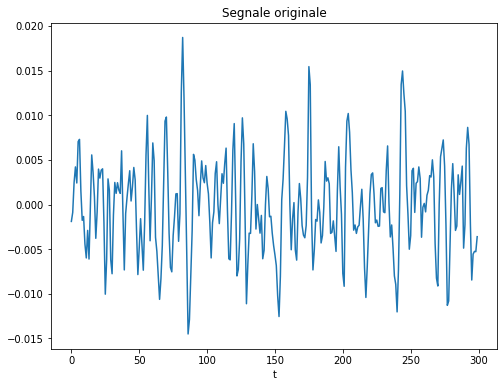

In [100]:
y_plot = drums_chunk
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")

# IPython.display.Audio(drums, rate=sr)

Possiamo sfocare la traccia applicando un *kernel Gaussiano* locale $K \in \mathbb{R}^{n\times n}$, tale che $K_{i, j} = g_{a,c}(j - i)$, dove $$g_{a,c}(j - i) = a \exp{-\frac{(j - i)^2}{2c^2}}.$$ È facile verificare che ogni diagonale di questa matrice contiene termini costanti. Una matrice che soddisfa questa proprietà è detta *matrice di Toeplitz*.

Dato che la funzione Gaussiana decresce esponenzialmente non c'e' bisogno di memorizzare tutte le entrate nella matrice $K$, a tal proposito impostiamo solo un numero `entries` di entrate diagonali.

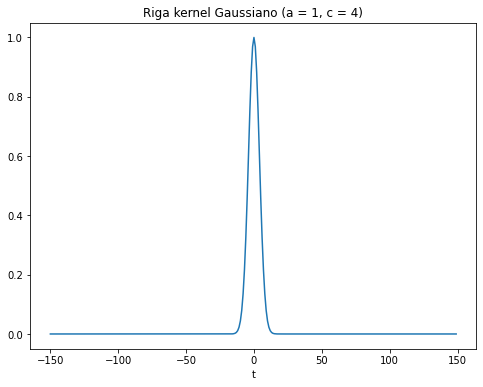

In [101]:
kernel_interval = np.arange(-n//2, n//2) #entries, dtype=np.int64) - (entries//2)

a = 1.
c = 4.
kernel_row = a*np.exp(-kernel_interval**2/(2*c**2))

y_plot = kernel_row
x_plot = kernel_interval
plot(x_plot, y_plot, title="Riga kernel Gaussiano (a = 1, c = 4)")

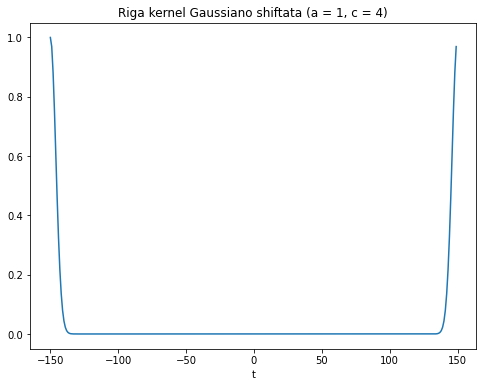

In [102]:
kernel_row_shifted = np.roll(kernel_row, shift=-n//2)
y_plot = kernel_row_shifted
x_plot = kernel_interval
plot(x_plot, y_plot, title="Riga kernel Gaussiano shiftata (a = 1, c = 4)")

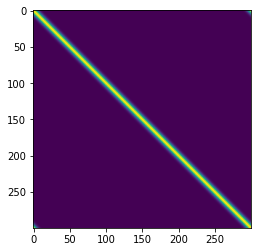

In [103]:
K = scipy.linalg.toeplitz(kernel_row_shifted)
plt.imshow(K)

In [55]:
# def multi_roll(x):
#   X = np.zeros((entries, x.shape[0]))
#   for i, j in enumerate(range(entries//2, -entries//2, -1)):
#     X[i, :] = np.roll(x, shift=j)
#   return X

Possiamo sfocare il segnale semplicemente applicando la matrice $G$:

In [105]:
drums_chunk_blur_c1 = K @ drums_chunk

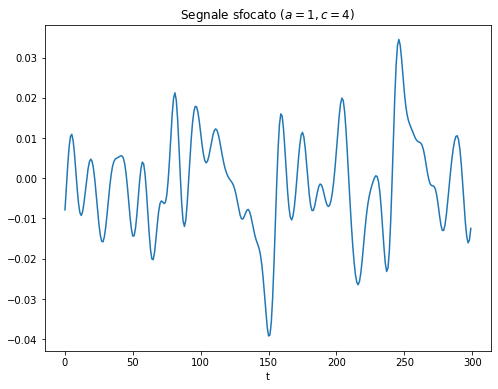

In [106]:
y_plot = drums_chunk_blur_c1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=4$)")

# IPython.display.Audio(drumsdrums_chunk_blur_blur, rate=sr)

Osserviamo che il segnale è diventato più *smooth*. Vediamo cosa succede se aumentiamo il parametro $c$:

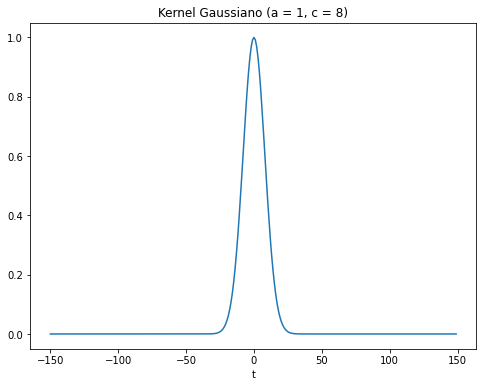

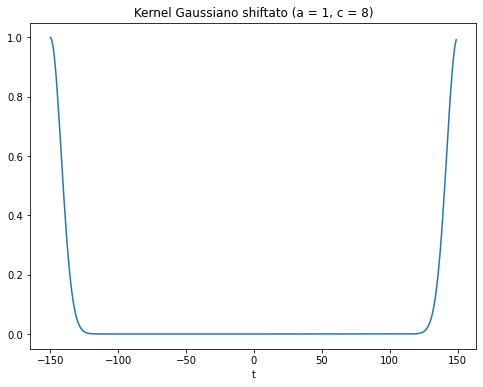

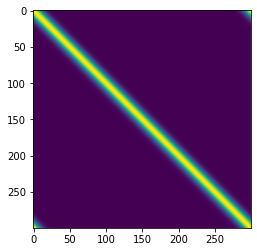

In [107]:
a = 1.
c = 8.                                                            
kernel_row = a*np.exp(-kernel_interval**2/(2*c**2))
                                                                   
y_plot = kernel_row                                                
x_plot = kernel_interval                                           
plot(x_plot, y_plot, title="Kernel Gaussiano (a = 1, c = 8)")    

kernel_row_shifted = np.roll(kernel_row, shift=-n//2)
y_plot = kernel_row_shifted
x_plot = kernel_interval
plot(x_plot, y_plot, title="Kernel Gaussiano shiftato (a = 1, c = 8)")

K = scipy.linalg.toeplitz(kernel_row_shifted)
plt.imshow(K)

In [108]:
drums_chunk_blur_c2 = K@drums_chunk

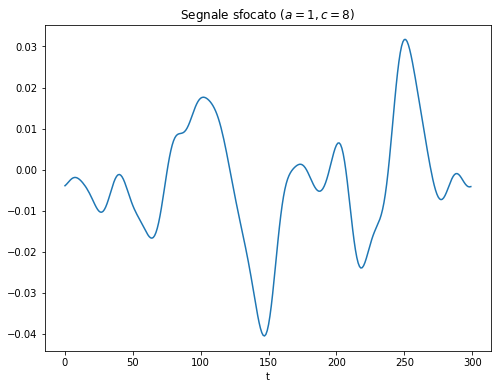

In [109]:
y_plot = drums_chunk_blur_c2
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=8$)")

# IPython.display.Audio(drums_blur, rate=sr)

Ci poniamo il seguente problema inverso: conoscendo la traccia sfocata $x_{\text{blurry}}$ e l'operatore di blurring $G$, possiamo risalire alla traccia originale $x$? Il problema è sotto-determinato essendoci infinite $x$ tali che $G x = x_{\text{blurry}}$. A tal fine risolviamo il problema usando un regolarizzatore di Tikhonov, provando diversi valori di $\alpha$

In [133]:
x_blurry = drums_chunk_blur_c2

alpha = 0.01

x_1 = np.linalg.inv(K.T@K + alpha*np.eye(K.shape[1]))@K.T@x_blurry

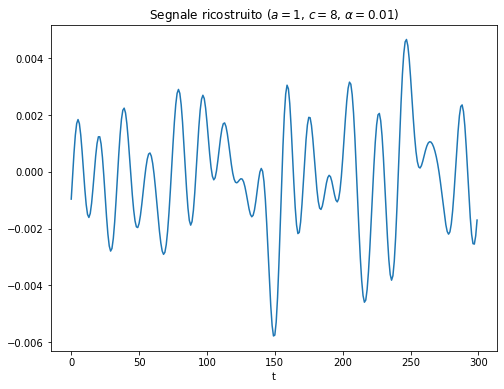

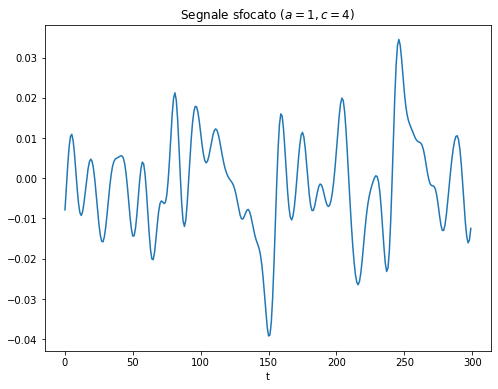

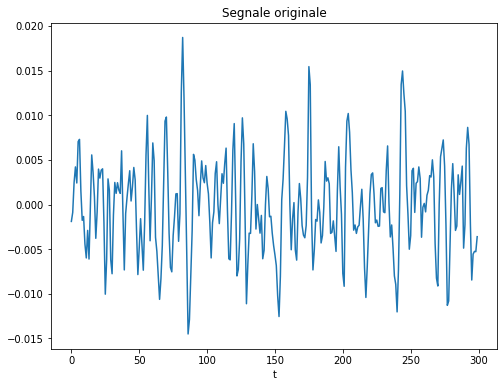

In [135]:
y_plot = x_1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale ricostruito ($a=1$, $c=8$, $\\alpha = 0.01$)")

y_plot = drums_chunk_blur_c1
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale sfocato ($a=1, c=4$)")

y_plot = drums_chunk
x_plot = np.arange(y_plot.shape[0])
plot(x_plot, y_plot, title="Segnale originale")

# IPython.display.Audio(x_1, rate=sr)

Non siamo riusciti a ricostruire il segnale originale, ma confrontando la soluzione con il segnale affetto da blur con $c=4$, notiamo che ci siamo avvicinati ad esso. Per avere una ricostruzione fedele si possono introdurre tecniche di learning (che esulano dallo scope di questa lezione).

L'esempio precedente non può essere ascoltato. Questo perchè codifichiamo solamente 300/44100 = 0.006s di traccia, una quantità impercettibile all'udito. 

Ripetiamo l'esempio con 2 secondi di traccia ($n$ = 88200). Se proviamo a creare la matrice $K$ come prima ci imbattiamo in problemi di memoria:

In [136]:
# carichiamo 88200 samples a partire da 0:10
n = 88200
drums_long = drums[t * sr: t * sr + n][:, np.newaxis]



Esecizio 2
